Curve parameters for Germany: [1. 1.]
Curve parameters for United States: [1. 1.]
Curve parameters for United Kingdom: [1. 1.]
Curve parameters for Pakistan: [1. 1.]
Curve parameters for China: [1. 1.]
Curve parameters for India: [1. 1.]
Curve parameters for Norway: [1. 1.]
No numeric values available for curve fitting.


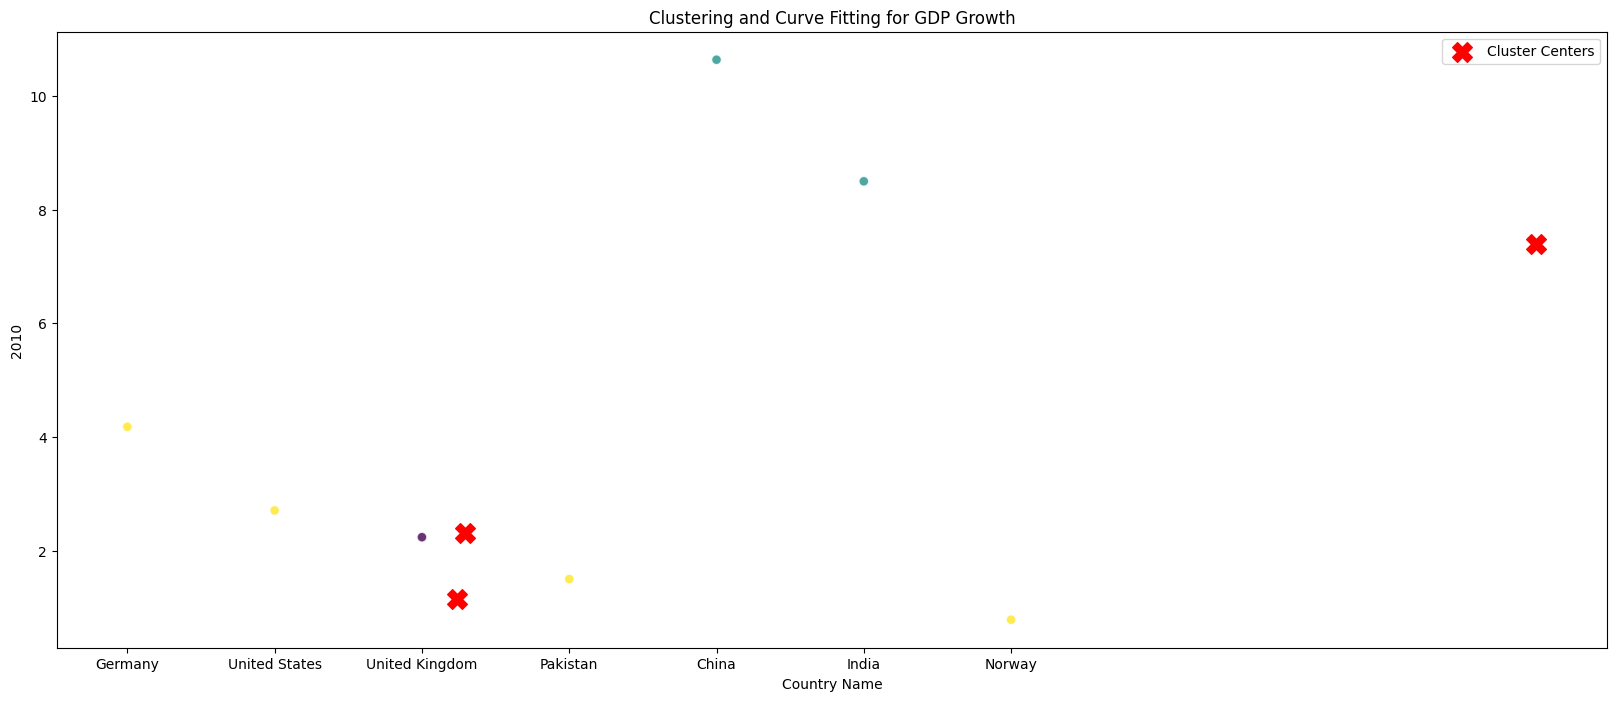

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

# Define functions for reading and transposing data
def read_data_excel(excel_url, sheet_name, new_cols, countries):
    data_read = pd.read_excel(excel_url, sheet_name=sheet_name, skiprows=3)
    data_read = data_read[new_cols]
    data_read.set_index('Country Name', inplace=True)
    data_read = data_read.loc[countries]
    return data_read, data_read.T

# Function to perform clustering using k-means
def perform_clustering(data, num_clusters):
    numeric_data = data.select_dtypes(include=[np.number])
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clustered_data = data.copy()
    clustered_data['Cluster'] = kmeans.fit_predict(numeric_data)
    return clustered_data, kmeans

# Function to fit a curve using curve_fit
def perform_curve_fit(x, y, func):
    x_numeric = pd.to_numeric(x, errors='coerce')
    y_numeric = pd.to_numeric(y, errors='coerce')
    xy_numeric = pd.DataFrame({'x': x_numeric, 'y': y_numeric}).dropna()  # Combine x and y into a DataFrame and drop NaN values
    if not xy_numeric.empty:
        popt, pcov = curve_fit(func, xy_numeric['x'], xy_numeric['y'])
        return popt, pcov
    else:
        print("No numeric values available for curve fitting.")
        return None, None

# Simple exponential growth function for curve fitting
def exponential_growth(x, a, b):
    return a * np.exp(b * x)

# Function to plot clustering results and curve fitting
def plot_results(data, x_col, y_col, cluster_col, func, title, kmeans):
    plt.figure(figsize=(20, 8))
    
    # Plot clustering results
    plt.scatter(data.index, data[y_col], c=data[cluster_col], cmap='viridis', s=50, alpha=0.8, edgecolors='w')
    
    # Plot cluster centers
    cluster_centers = kmeans.cluster_centers_
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
    
    # Plot curve fitting
    x_fit_values = pd.to_numeric(data.index, errors='coerce').dropna()
    
    if not x_fit_values.empty:
        x_fit = np.linspace(min(x_fit_values), max(x_fit_values), 100)
        y_fit = func(x_fit, *popt)
        plt.plot(x_fit, y_fit, '--', color='black', label='Curve Fit')
    else:
        print("No numeric values available for curve fitting.")
    
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.show()

# The Excel URL below indicates GDP growth (annual %)
excel_url_GDP = 'https://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.KD.ZG?downloadformat=excel'

# Parameters for reading and transposing data
sheet_name = 'Data'
new_cols = ['Country Name', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
countries = ['Germany', 'United States', 'United Kingdom', 'Pakistan', 'China', 'India', 'Norway']

# Read and transpose GDP growth data
data_GDP, data_GDP_transpose = read_data_excel(excel_url_GDP, sheet_name, new_cols, countries)

# Perform clustering on GDP growth data
num_clusters = 3  # You can adjust the number of clusters
data_GDP_clustered, kmeans = perform_clustering(data_GDP, num_clusters)

# Fit an exponential growth curve to GDP growth data

x_col = 'Country Name'
y_col = '2010'  # You can choose any year
# popt, pcov = perform_curve_fit(data_GDP.index, data_GDP[y_col], exponential_growth)
# Fit an exponential growth curve to GDP growth data for each country
for country in data_GDP.index:
    popt, pcov = perform_curve_fit(new_cols[1:], data_GDP.loc[country, new_cols[1:]], exponential_growth)
    if popt is not None:
        print(f"Curve parameters for {country}: {popt}")

# Plot clustering results and curve fitting for GDP growth
plot_results(data_GDP_clustered, x_col, y_col, 'Cluster', exponential_growth, 'Clustering and Curve Fitting for GDP Growth', kmeans)



GDP Growth Data for Germany:
      Year  GDP Growth (%)
2010  2010        4.179882
2011  2011        3.925193
2012  2012        0.418498
2013  2013        0.437591
2014  2014        2.209543
2015  2015        1.491932
2016  2016        2.230000
2017  2017        2.680231
2018  2018        0.981233
2019  2019        1.075472
2020  2020       -3.826769
2021  2021        3.163820
2022  2022        1.806209


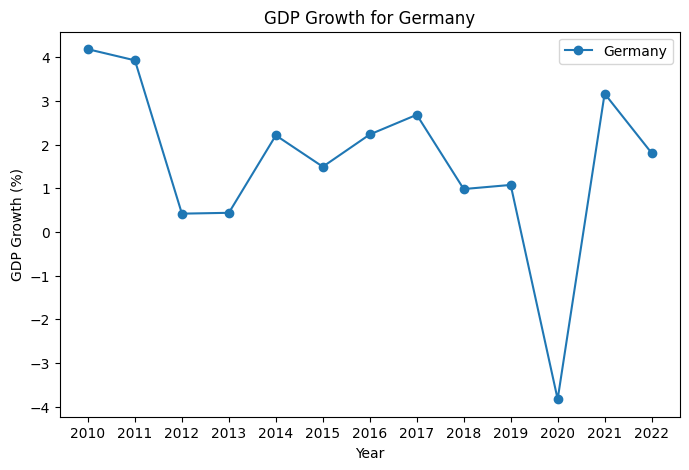


GDP Growth Data for United States:
      Year  GDP Growth (%)
2010  2010        2.708857
2011  2011        1.549895
2012  2012        2.280688
2013  2013        1.841875
2014  2014        2.287776
2015  2015        2.706370
2016  2016        1.667472
2017  2017        2.241921
2018  2018        2.945385
2019  2019        2.294439
2020  2020       -2.767803
2021  2021        5.945485
2022  2022        1.935635


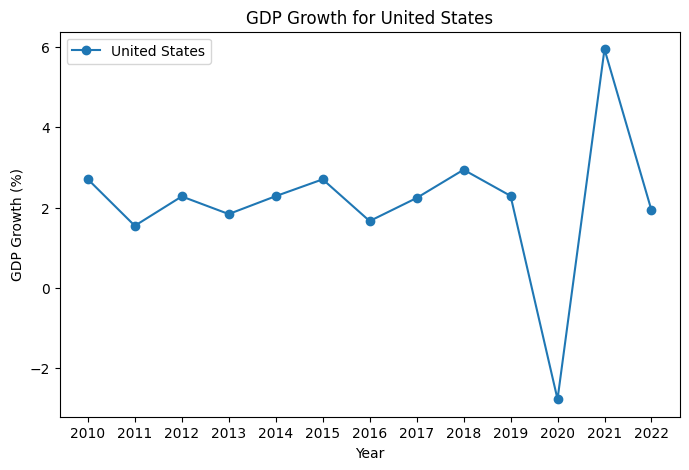


GDP Growth Data for United Kingdom:
      Year  GDP Growth (%)
2010  2010        2.238689
2011  2011        1.145102
2012  2012        1.512937
2013  2013        1.792322
2014  2014        3.195782
2015  2015        2.220258
2016  2016        1.921063
2017  2017        2.655070
2018  2018        1.403792
2019  2019        1.641611
2020  2020      -10.359901
2021  2021        8.674904
2022  2022        4.346561


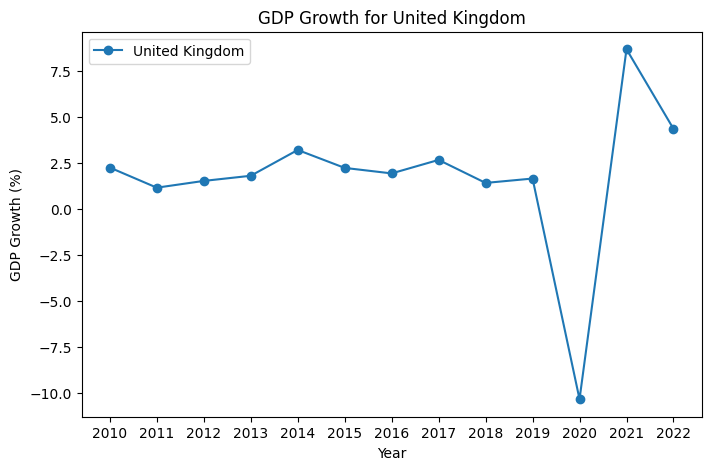


GDP Growth Data for Pakistan:
      Year  GDP Growth (%)
2010  2010        1.501718
2011  2011        2.680117
2012  2012        3.027584
2013  2013        4.366865
2014  2014        4.116428
2015  2015        4.217942
2016  2016        6.573838
2017  2017        4.432626
2018  2018        6.151703
2019  2019        2.497637
2020  2020       -1.274087
2021  2021        6.513886
2022  2022        4.705803


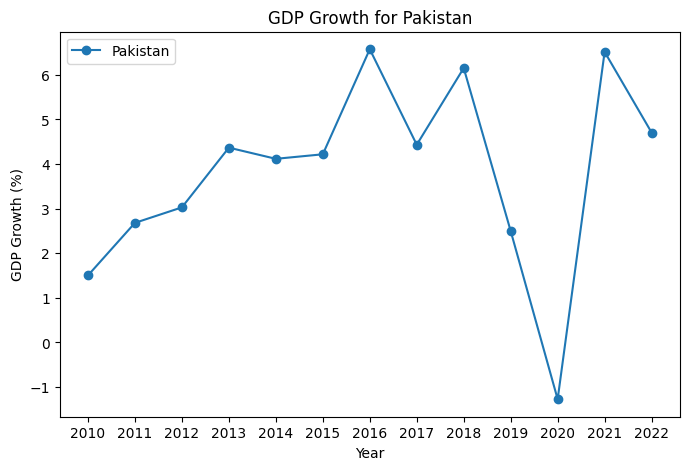


GDP Growth Data for China:
      Year  GDP Growth (%)
2010  2010       10.635871
2011  2011        9.550832
2012  2012        7.863736
2013  2013        7.766150
2014  2014        7.425764
2015  2015        7.041329
2016  2016        6.848762
2017  2017        6.947201
2018  2018        6.749774
2019  2019        5.950501
2020  2020        2.238638
2021  2021        8.448469
2022  2022        2.989084


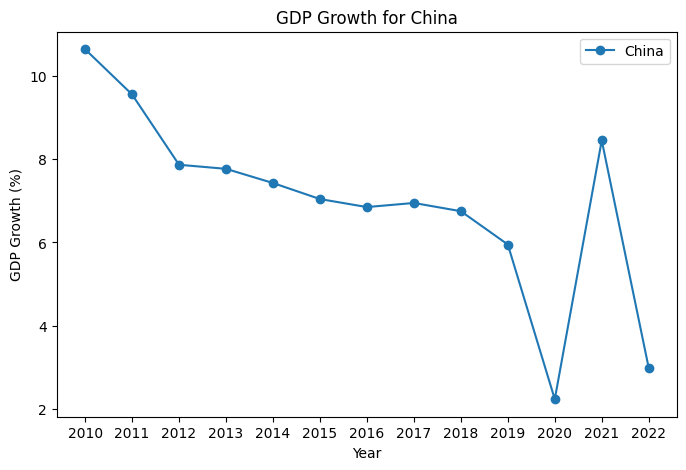


GDP Growth Data for India:
      Year  GDP Growth (%)
2010  2010        8.497585
2011  2011        5.241315
2012  2012        5.456389
2013  2013        6.386106
2014  2014        7.410228
2015  2015        7.996254
2016  2016        8.256305
2017  2017        6.795383
2018  2018        6.453851
2019  2019        3.871437
2020  2020       -5.831053
2021  2021        9.050278
2022  2022        7.239693


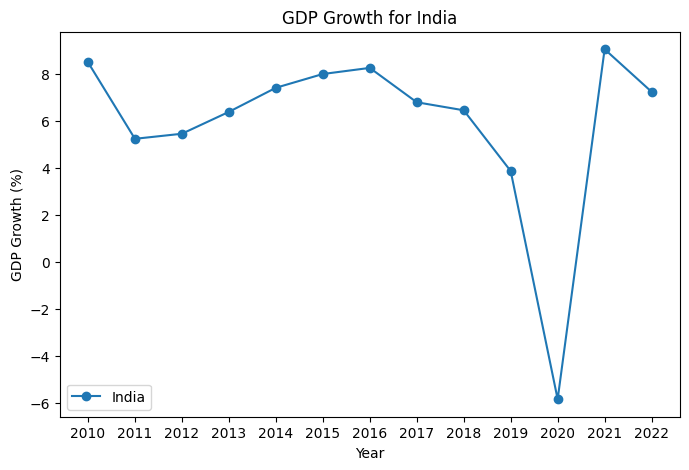


GDP Growth Data for Norway:
      Year  GDP Growth (%)
2010  2010        0.787052
2011  2011        1.105656
2012  2012        2.717959
2013  2013        1.016191
2014  2014        2.048132
2015  2015        1.857340
2016  2016        1.164724
2017  2017        2.463746
2018  2018        0.828931
2019  2019        1.123747
2020  2020       -1.278172
2021  2021        3.898399
2022  2022        3.277345


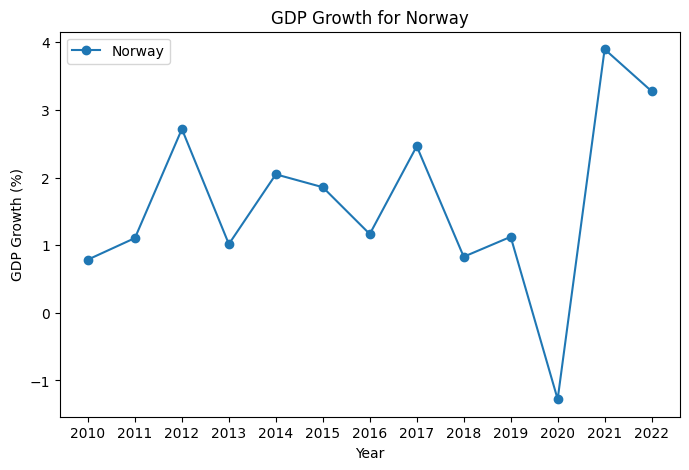

In [47]:
# Visualize GDP growth data for each country and print values
for country in data_GDP.index:
    x_values = new_cols[1:]
    y_values = data_GDP.loc[country, new_cols[1:]]

    print(f"\nGDP Growth Data for {country}:")
    print(pd.DataFrame({'Year': x_values, 'GDP Growth (%)': y_values}))

    plt.figure(figsize=(8, 5))
    plt.plot(x_values, y_values, marker='o', label=country)
    plt.title(f'GDP Growth for {country}')
    plt.xlabel('Year')
    plt.ylabel('GDP Growth (%)')
    plt.legend()
    plt.show()


In [3]:
# Define logistic function for curve fitting
def logistic_function(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))



Fitting Curves for GDP Growth in Germany:
Exponential Growth Parameters for Germany: [1. 1.]
Logistic Growth Parameters for Germany: [1.59791034 1.         1.        ]


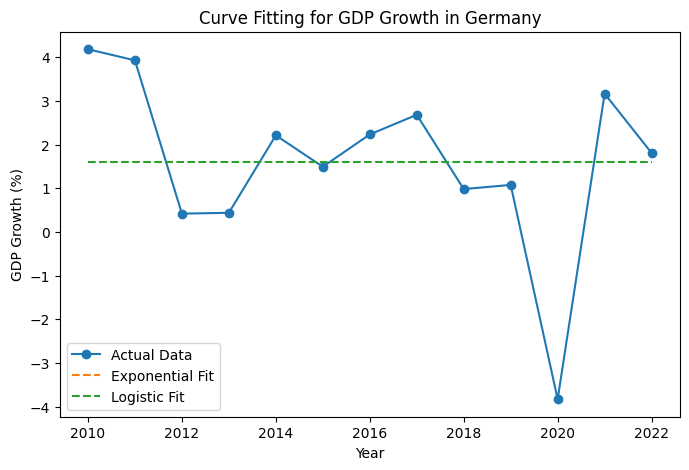


Fitting Curves for GDP Growth in United States:
Exponential Growth Parameters for United States: [1. 1.]
Logistic Growth Parameters for United States: [2.12599955 1.         1.        ]


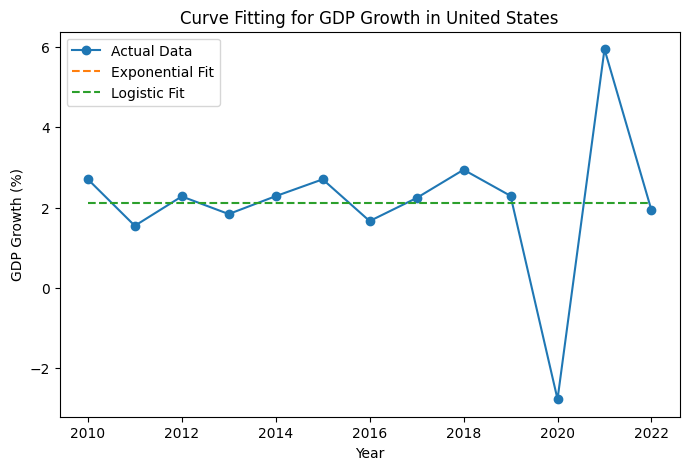


Fitting Curves for GDP Growth in United Kingdom:
Exponential Growth Parameters for United Kingdom: [1. 1.]
Logistic Growth Parameters for United Kingdom: [1.72216852 1.         1.        ]


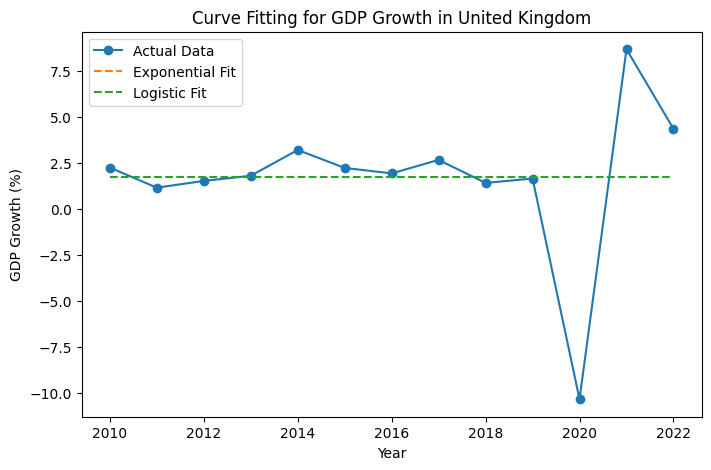


Fitting Curves for GDP Growth in Pakistan:
Exponential Growth Parameters for Pakistan: [1. 1.]
Logistic Growth Parameters for Pakistan: [3.80861989 1.         1.        ]


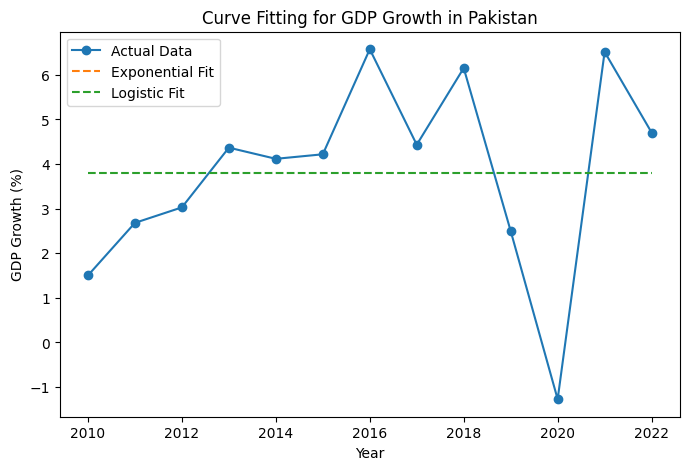


Fitting Curves for GDP Growth in China:
Exponential Growth Parameters for China: [1. 1.]
Logistic Growth Parameters for China: [6.95816244 1.         1.        ]


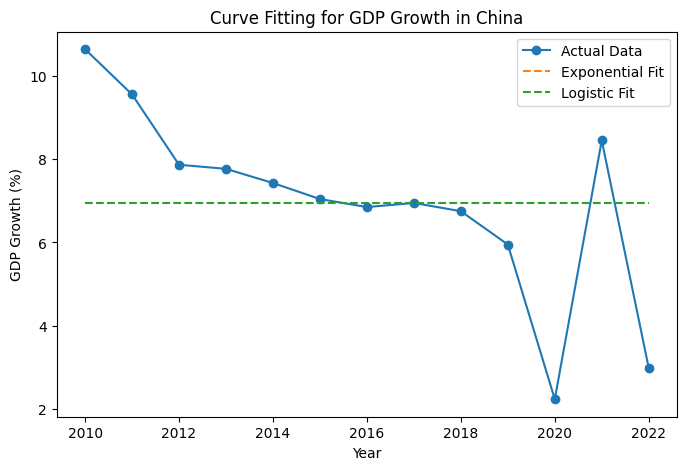


Fitting Curves for GDP Growth in India:
Exponential Growth Parameters for India: [1. 1.]
Logistic Growth Parameters for India: [5.90952088 1.         1.        ]


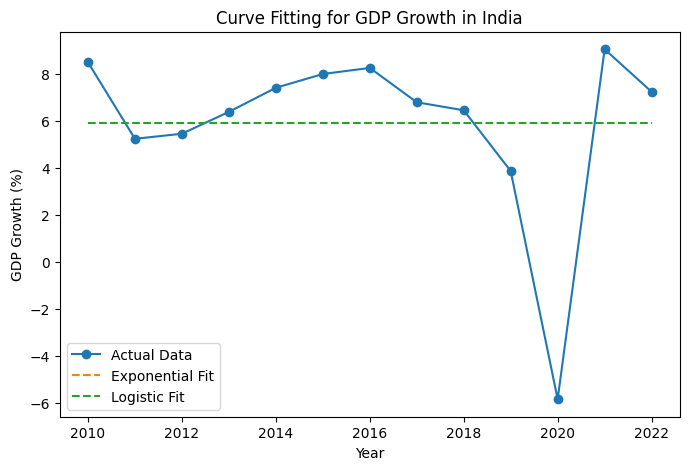


Fitting Curves for GDP Growth in Norway:
Exponential Growth Parameters for Norway: [1. 1.]
Logistic Growth Parameters for Norway: [1.61623473 1.         1.        ]


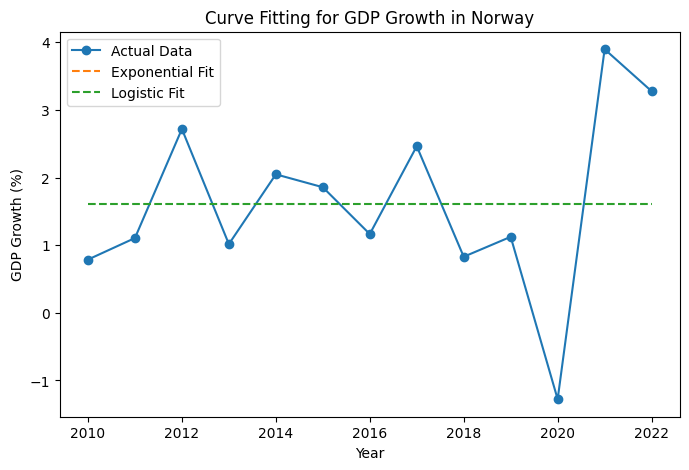

In [4]:
# Fit exponential and logistic growth curves for each country
for country in data_GDP.index:
    x_values = pd.to_numeric(new_cols[1:], errors='coerce')
    y_values = data_GDP.loc[country, new_cols[1:]]

    print(f"\nFitting Curves for GDP Growth in {country}:")

    # Exponential growth curve fitting
    popt_exp, pcov_exp = perform_curve_fit(x_values, y_values, exponential_growth)
    if popt_exp is not None:
        print(f"Exponential Growth Parameters for {country}: {popt_exp}")

    # Logistic growth curve fitting
    popt_log, pcov_log = perform_curve_fit(x_values, y_values, logistic_function)
    if popt_log is not None:
        print(f"Logistic Growth Parameters for {country}: {popt_log}")

    # Visualize the data and fitted curves
    plt.figure(figsize=(8, 5))
    plt.plot(x_values, y_values, marker='o', label='Actual Data')
    
    if popt_exp is not None:
        y_fit_exp = exponential_growth(x_values, *popt_exp)
        plt.plot(x_values, y_fit_exp, '--', label='Exponential Fit')
    
    if popt_log is not None:
        y_fit_log = logistic_function(x_values, *popt_log)
        plt.plot(x_values, y_fit_log, '--', label='Logistic Fit')

    plt.title(f'Curve Fitting for GDP Growth in {country}')
    plt.xlabel('Year')
    plt.ylabel('GDP Growth (%)')
    plt.legend()
    plt.show()


In [5]:
def perform_curve_fit_updated(x, y, func, initial_params, maxfev=None):
    x_numeric = pd.to_numeric(x, errors='coerce')
    y_numeric = pd.to_numeric(y, errors='coerce')
    
    # Remove NaN and infinite values
    mask_finite = np.isfinite(x_numeric) & np.isfinite(y_numeric)
    x_numeric = x_numeric[mask_finite]
    y_numeric = y_numeric[mask_finite]

    # Perform curve fitting with adjusted initial parameters
    popt, pcov = curve_fit(func, x_numeric, y_numeric, p0=initial_params, maxfev=maxfev)
    return popt, pcov


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats  # Add this line to import the stats module
from scipy.optimize import curve_fit

# ... (rest of your code)


def err_ranges(func, p, pcov, x, alpha=0.05):
    """
    Estimate the confidence range for the fitted curve.

    Parameters:
    - func: The function used for curve fitting.
    - p: Fitted parameters.
    - pcov: Covariance matrix of the fitted parameters.
    - x: x values for prediction.
    - alpha: Significance level for confidence interval.

    Returns:
    - y_lower: Lower bound of the confidence interval.
    - y_upper: Upper bound of the confidence interval.
    """
    n = len(x)
    dof = max(0, n - len(p))  # Degrees of freedom
    t_val = stats.t.ppf(1 - alpha / 2, dof)
    delta = np.sqrt(np.diag(pcov))
    y_lower = func(x, *(p - t_val * delta))
    y_upper = func(x, *(p + t_val * delta))
    return y_lower, y_upper


# Function to make predictions and plot results
def make_predictions_and_plot(data, func, title, initial_params):
    plt.figure(figsize=(20, 8))

    for country in data.index:
        x_values = pd.to_numeric(new_cols[1:], errors='coerce')
        y_values = data.loc[country, new_cols[1:]]

        # Scale x-axis values
        x_scaled = (x_values - min(x_values)) / (max(x_values) - min(x_values))

        # Fit the logistic growth curve with adjusted initial parameters
        # Fit the logistic growth curve with adjusted initial parameters
        popt_log, pcov_log = perform_curve_fit_updated(x_scaled, y_values, logistic_function_updated, initial_params_logistic, maxfev=5000)


        if popt_log is not None:
            # Predict future values for the next 20 years
            x_future = np.arange(2023, 2043)
            y_pred = logistic_function_updated(x_future, *popt_log)

            # Estimate confidence range
            y_lower, y_upper = err_ranges(func, popt_log, pcov_log, x_future)


            # Plot the fitted curve, predictions, and confidence range
            plt.plot(x_values, y_values, 'o', label=f'{country} - Actual Data')
            plt.plot(x_future, y_pred, label=f'{country} - Predictions', linestyle='--')
            plt.fill_between(x_future, y_lower, y_upper, alpha=0.2, label=f'{country} - Confidence Range')

    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('GDP Growth (%)')
    plt.legend()
    plt.show()

# # Make predictions and plot results for GDP growth
# make_predictions_and_plot(data_GDP, logistic_function_updated, 'Predictions and Confidence Range for GDP Growth', initial_params_logistic)

# Updated logistic growth function
def logistic_function_updated(x, a, b, c, d):
    return a / (1 + np.exp(-b * (x - c))) + d

# Initial parameters for the logistic growth function
initial_params_logistic = [1.0, 1.0, 1.0, 0.0]

# Make predictions and plot results for GDP growth
make_predictions_and_plot(data_GDP, logistic_function_updated, 'Predictions and Confidence Range for GDP Growth', initial_params_logistic)


In [ ]:
# Print the content and structure of the DataFrame
print(data_GDP)



                     2010      2011      2012      2013      2014      2015  \
Country Name                                                                  
Germany          4.179882  3.925193  0.418498  0.437591  2.209543  1.491932   
United States    2.708857  1.549895  2.280688  1.841875  2.287776  2.706370   
United Kingdom   2.238689  1.145102  1.512937  1.792322  3.195782  2.220258   
Pakistan         1.501718  2.680117  3.027584  4.366865  4.116428  4.217942   
China           10.635871  9.550832  7.863736  7.766150  7.425764  7.041329   
India            8.497585  5.241315  5.456389  6.386106  7.410228  7.996254   
Norway           0.787052  1.105656  2.717959  1.016191  2.048132  1.857340   

                    2016      2017      2018      2019       2020      2021  \
Country Name                                                                  
Germany         2.230000  2.680231  0.981233  1.075472  -3.826769  3.163820   
United States   1.667472  2.241921  2.945385  2.294